In [4]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [5]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert all columns to numeric (if possible)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Drop or encode non-numeric columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # If the column is categorical
        encoder = LabelEncoder()
        X_train[col] = encoder.fit_transform(X_train[col])
        X_test[col] = encoder.transform(X_test[col])


In [15]:
print(X_train.isnull().sum())  # Check missing values
X_train = X_train.dropna()  # Optionally drop rows with missing values


pregnant    1
insulin     1
bmi         1
age         1
glucose     1
bp          1
pedigree    1
dtype: int64


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset and preprocess
df = pd.read_csv("diabetes.csv")  # Replace with your actual dataset
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Split into features (X) and target (y)
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with your target variable
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Train model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
print("Prediction successful!")


Prediction successful!


c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[95,  7],
       [21, 31]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

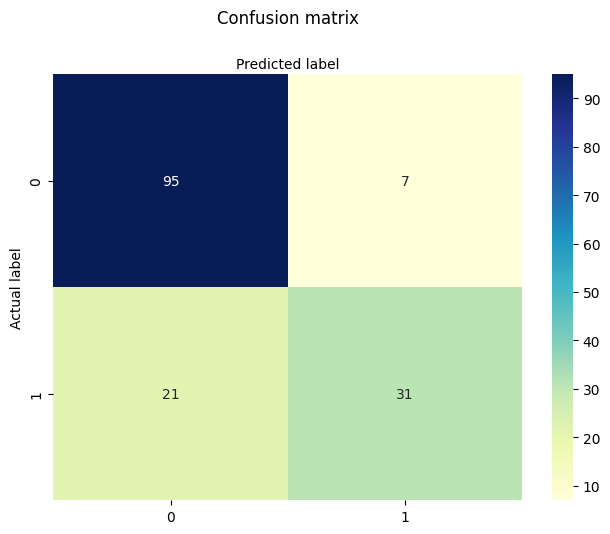

In [20]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [21]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       102
   with diabetes       0.82      0.60      0.69        52

        accuracy                           0.82       154
       macro avg       0.82      0.76      0.78       154
    weighted avg       0.82      0.82      0.81       154



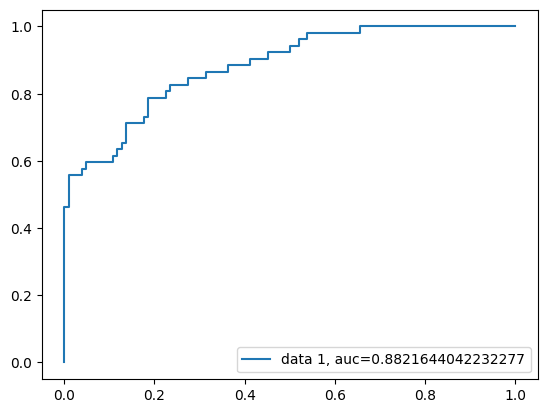

In [22]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()